In [97]:
import pandas as pd
df = pd.read_csv("Advertising.csv") #satis verisi
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


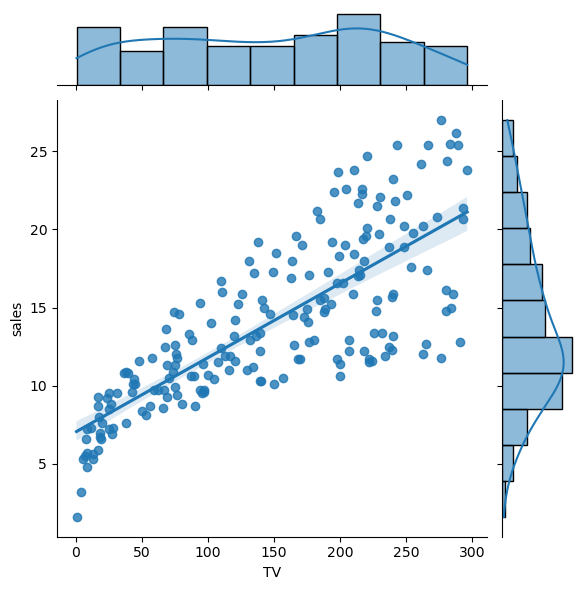

In [101]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
X = df[["TV"]] #bagimsiz degiskenimiz

In [107]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [109]:
y = df[["sales"]] #bagimli degiskenimiz

In [111]:
reg = LinearRegression() #model nesnesi olusturma

In [113]:
model = reg.fit(X,y) #modeli fit etme kurma

In [115]:
model

LinearRegression()

In [117]:
str(model)

'LinearRegression()'

In [119]:
model.intercept_ #regresyon modelinin sabit terimi(b0)

array([7.03259355])

In [121]:
model.coef_ #b1 katsayisi (bagimsiz degiskenlerin katsayilari,etkileri)

array([[0.04753664]])

In [123]:
#rkare modelin basarsini olcen deger
model.score(X,y) #bagimli degiskenlerdeki degiskenligin bagimsiz degiskenlerce aciklanmasina denir

0.611875050850071

### Tahmin

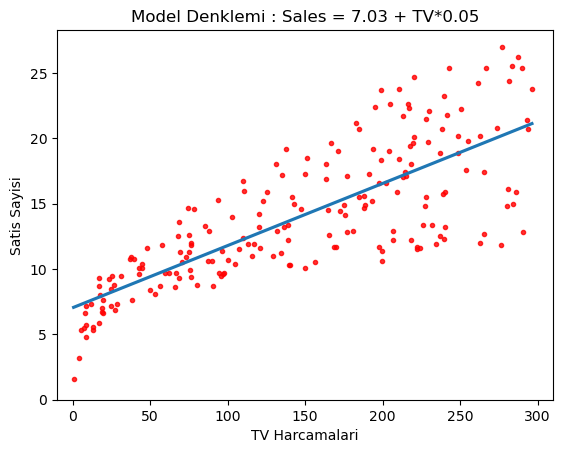

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(x=df["TV"] ,y=df["sales"] , ci = None , scatter_kws = {'color':'r','s':9})
#ci= parametresi=(guven araligi), regresyon çizgisinin etrafındaki güven aralığını belirler.
#ci = None yaparsak bu güven aralığı cizilmez ve sadece regresyon cizgisi kalir
#scatter_kws = r = red , s:9 = size
g.set_title("Model Denklemi : Sales = 7.03 + TV*0.05")
g.set_ylabel("Satis Sayisi")
g.set_xlabel("TV Harcamalari")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales = 7.03 + 0.05*TV

In [129]:
#7.03 + 0.05*165 165 birimlik tv harcamasi yaparsak
model.intercept_ + model.coef_*165 #demek bu ama bu daha net dogru sonucu verir

SyntaxError: invalid syntax (1416655624.py, line 2)

In [131]:
model.predict([[165]])

/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [133]:
yeni_veri = [[5],[15],[30]]

In [135]:
model.predict(yeni_veri)

/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

### Artiklar ve Makine Ogrenmesindeki Onemi

##### MSE : Hata Kareler Ortalamasi
##### RMSE : Hata Kareler Ortalamasi Karekoku

In [139]:
y.head() #gercek degerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [141]:
model.predict(X)[0:6] #tahmin edilen degerler

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [143]:
gercek_y =y[0:10]

In [145]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [147]:
hatalar =pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [149]:
hatalar.columns=["gercek_y","tahmin_edilen_y"]

In [151]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [153]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [155]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [157]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [159]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [167]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638105